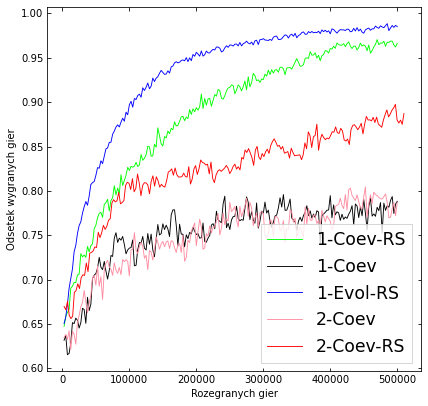

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import csv

files = {
    '1-Coev-RS': {'filename': 'cel-rs.csv', 'color': '#00ff00'},
    '1-Coev': { 'filename': 'cel.csv', 'color': '#000000' },
    '1-Evol-RS': { 'filename': 'rsel.csv', 'color': '#0000ff'},
    '2-Coev': { 'filename': '2cel.csv', 'color': '#ff8da1'},
    '2-Coev-RS': { 'filename': '2cel-rs.csv', 'color': '#ff0000' }
}

folder_with_data = './'

plt.figure(figsize=(6.7, 6.7))
plt.tick_params(top=True, right=True, bottom=True, left=True, direction='in')

for name_of_algorithm, subData in files.items():
    nameOfDataset = subData['filename']
    color = subData['color']
        
    with open(f'{folder_with_data}/{nameOfDataset}') as file:
        columns, *data = list(csv.reader(file))
        columns = dict(map(reversed, enumerate(columns)))
        data = list(map(lambda x: list(map(float, x)), data))
        x = list(map(lambda x: x[columns['effort']], data))
        y = list(map(lambda x: statistics.mean(x[2:]), data))
        plt.plot(x, y, label=name_of_algorithm, linewidth=0.9, color=color)

plt.xlabel('Rozegranych gier')
plt.ylabel('Odsetek wygranych gier')
plt.legend(fontsize='xx-large', loc='lower right', fancybox=False)
plt.show()

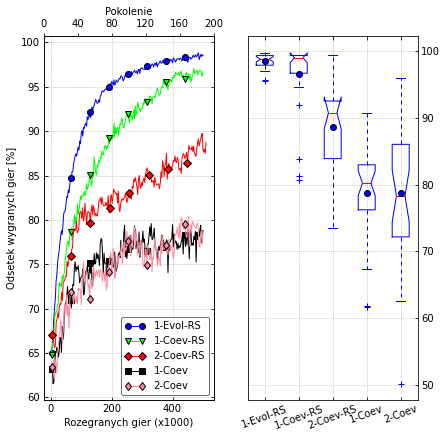

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import csv

files = {
    '1-Evol-RS': { 'filename': 'rsel.csv', 'color': '#0000ff', 'marker': 'o'},
    '1-Coev-RS': {'filename': 'cel-rs.csv', 'color': '#00ff00', 'marker': 'v'},
    '2-Coev-RS': { 'filename': '2cel-rs.csv', 'color': '#ff0000', 'marker': 'D'},
    '1-Coev': { 'filename': 'cel.csv', 'color': '#000000', 'marker': 's'},
    '2-Coev': { 'filename': '2cel.csv', 'color': '#ff8da1', 'marker': 'd'}
}

folder_with_data = './'

plt.figure(figsize=(6.7, 6.7))
plt.subplot(1, 2, 1) 
plt.tick_params(top=True, right=True, bottom=True, left=True, direction='in')

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']



for name_of_algorithm, subData in files.items():
    nameOfDataset = subData['filename']
    color = subData['color']
    marker = subData['marker']
        
    with open(f'{folder_with_data}/{nameOfDataset}') as file:
        columns, *data = list(csv.reader(file))
        columns = dict(map(reversed, enumerate(columns)))
        data = list(map(lambda x: list(map(float, x)), data))
        x = list(map(lambda x: x[columns['effort']] / 1000, data))
        y = list(map(lambda x: 100 * statistics.mean(x[2:]), data))
        plt.plot(x, y, color=color, marker=marker, markevery=25, markeredgecolor='black', linewidth=1, label=name_of_algorithm)
        
plt.grid(True, dashes=(1, 7), linestyle=':')
plt.legend(loc='lower right', edgecolor='0.3', numpoints=2)
plt.xlabel('Rozegranych gier (x1000)')
plt.ylabel('Odsetek wygranych gier [%]')
 
top = plt.gca().twiny()
top.set_xticks(list(range(0, 201, 40)))
top.set_xlabel('Pokolenie')
plt.subplot(1, 2, 2)
    
plt.grid(True, dashes=(1, 7), linestyle=':')
plt.tick_params(top=True, right=True, bottom=True, left=True, direction='in')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()   
    
BOXPLOT = {}
for name_of_algorithm, subData in files.items():
    nameOfDataset = subData['filename']
    with open(f'{folder_with_data}/{nameOfDataset}') as file:
        *_, data = csv.reader(file)
        data = list(map(lambda x: 100 * float(x), data[2:]))
        BOXPLOT[name_of_algorithm] = data
    
plt.boxplot(BOXPLOT.values(), 1, medianprops={'color': 'r'}, boxprops={'color': 'b'}, showmeans=True, 
            flierprops={'marker': '+', 'markeredgecolor': 'b'}, capprops={'color': 'b'},
            meanprops={'marker': 'o', 'markerfacecolor': 'b', 'markeredgecolor': '0', 'markeredgewidth': 1}, 
            whiskerprops={'linestyle': '--', 'color': 'b', 'dashes': (4, 4)}
           )
plt.gca().set_xticklabels(BOXPLOT.keys(), rotation=20)
plt.show()